In [1]:
import pandas as pd

In [2]:
df_district = pd.read_csv('Bagerhat_historical_weather_1980_2024.csv')

In [3]:
df_district.info()
df_district.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16437 entries, 0 to 16436
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   district                       16437 non-null  object 
 1   day                            16437 non-null  int64  
 2   month                          16437 non-null  int64  
 3   year                           16437 non-null  int64  
 4   temperature(degree C)          10478 non-null  float64
 5   feels_like(degree C)           10478 non-null  float64
 6   max_temperature(degree C)      14991 non-null  float64
 7   minimum_temperature(degree C)  14991 non-null  float64
 8   humidity                       10478 non-null  float64
 9   precipitation                  5479 non-null   float64
 10  windspeed                      11924 non-null  float64
 11  atmospheric_pressure           7115 non-null   float64
 12  UV                             4038 non-null  

,district,day,month,year,temperature(degree C),feels_like(degree C),max_temperature(degree C),minimum_temperature(degree C),humidity,precipitation,windspeed,atmospheric_pressure,UV,solar_radiation,dew_point
0,Bagerhat,1,1,1980,21.7,21.7,26.1,18.1,77.1,NaN,3.6,1013.0,NaN,NaN,17.1
1,Bagerhat,2,1,1980,20.8,20.8,25.1,15.1,64.4,NaN,5.4,1012.9,NaN,NaN,13.3
2,Bagerhat,3,1,1980,23.0,23.0,26.1,16.6,60.2,NaN,16.6,1013.0,NaN,NaN,14.1
3,Bagerhat,4,1,1980,22.3,22.3,26.1,16.1,70.4,NaN,18.4,1014.2,NaN,NaN,16.3
4,Bagerhat,5,1,1980,22.1,22.1,26.1,18.1,67.8,NaN,11.2,1015.1,NaN,NaN,15.5


In [6]:
df_district_storm_risk= df_district['atmospheric_pressure'].count()
print (f"atmospheric_pressure has : {df_district_storm_risk}")

atmospheric_pressure has : 7115


# Features for dew point

In [7]:
desired_colmn = ['day', 'month', 'year','atmospheric_pressure']
atmospheric_pressure_df_district = df_district[desired_colmn]

atmospheric_pressure_df_district.head()

,day,month,year,atmospheric_pressure
0,1,1,1980,1013.0
1,2,1,1980,1012.9
2,3,1,1980,1013.0
3,4,1,1980,1014.2
4,5,1,1980,1015.1


In [8]:
with_no_null_atmospheric_pressure = atmospheric_pressure_df_district.dropna()
print(f"After removing missing values from bagerhat, dataset contains {with_no_null_atmospheric_pressure.shape[0]} rows and {with_no_null_atmospheric_pressure.shape[1]} columns out of {with_no_null_atmospheric_pressure.shape[0]} rows.")
with_no_null_atmospheric_pressure.head(20)

After removing missing values from bagerhat, dataset contains 7115 rows and 4 columns out of 7115 rows.


,day,month,year,atmospheric_pressure
0,1,1,1980,1013.0
1,2,1,1980,1012.9
2,3,1,1980,1013.0
3,4,1,1980,1014.2
4,5,1,1980,1015.1
5,6,1,1980,1014.9
6,7,1,1980,1015.5
7,8,1,1980,1016.3
10,11,1,1980,1014.6
13,14,1,1980,1013.9


In [9]:
with_no_null_atmospheric_pressure.describe()

,day,month,year,atmospheric_pressure
count,7115.000000,7115.000000,7115.000000,7115.000000
mean,15.712017,6.551651,2011.227266,1008.247646
std,8.814801,3.479119,11.949238,5.647070
min,1.000000,1.000000,1980.000000,982.700000
25%,8.000000,4.000000,2010.000000,1003.800000
50%,16.000000,7.000000,2015.000000,1008.600000
75%,23.000000,10.000000,2020.000000,1013.000000
max,31.000000,12.000000,2024.000000,1088.100000


# time series anaysis

Date range: 1980-01-01 to 2024-12-31


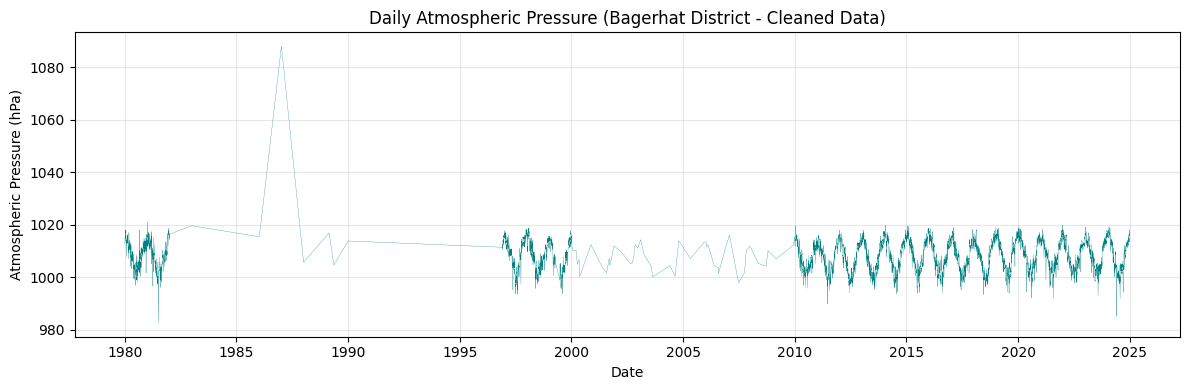

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure a datetime column exists
if 'date' not in with_no_null_atmospheric_pressure.columns:
    with_no_null_atmospheric_pressure['date'] = pd.to_datetime(
        with_no_null_atmospheric_pressure[['year', 'month', 'day']]
    )

# Show date range
min_date = with_no_null_atmospheric_pressure['date'].min()
max_date = with_no_null_atmospheric_pressure['date'].max()
print(f"Date range: {min_date.date()} to {max_date.date()}")

# Plot daily atmospheric pressure time series
plt.figure(figsize=(12, 4))
plt.plot(with_no_null_atmospheric_pressure['date'], with_no_null_atmospheric_pressure['atmospheric_pressure'],
         linewidth=0.2, color='teal')
plt.xlabel('Date')
plt.ylabel('Atmospheric Pressure (hPa)')
plt.title('Daily Atmospheric Pressure (Bagerhat District - Cleaned Data)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Random Forest for Dew Point

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------------
# 1. Start from your *clean* dataframe (the one that already has no NaNs)
# ------------------------------------------------------------------
df = with_no_null_atmospheric_pressure.copy()          # <-- your cleaned data

# ------------------------------------------------------------------
# 2. Keep only the columns you care about
# ------------------------------------------------------------------
desired_column = ['day', 'month', 'year','atmospheric_pressure']  # <-- only these columns

# If any of the predictor columns are missing, pandas will raise a clear error
df = df[desired_column]

# ------------------------------------------------------------------
# 3. (Optional) Build a proper datetime column – useful for later plots
# ------------------------------------------------------------------
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# ------------------------------------------------------------------
# 4. Define FEATURES and TARGET
# ------------------------------------------------------------------
FEATURES = ['day', 'month', 'year']   # <-- only these two
TARGET   = 'atmospheric_pressure'

X = df[FEATURES]
y = df[TARGET].astype(float)

# ------------------------------------------------------------------
# 5. Train / test split
# ------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)

# ------------------------------------------------------------------
# 6. Random Forest (a few sensible defaults)
# ------------------------------------------------------------------
rf = RandomForestRegressor(
    n_estimators=500,
    # max_depth=40,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ------------------------------------------------------------------
# 7. Predictions & classic metrics
# ------------------------------------------------------------------
y_pred = rf.predict(X_test)

rf_r2  = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)

def tolerance_accuracy(y_true, y_hat, tol):
    return 100 * (np.abs(y_true - y_hat) <= tol).mean()

rf_acc_05 = tolerance_accuracy(y_test.values, y_pred, 0.5)
rf_acc_10 = tolerance_accuracy(y_test.values, y_pred, 1.0)
rf_acc_20 = tolerance_accuracy(y_test.values, y_pred, 2.0)
rf_acc_30 = tolerance_accuracy(y_test.values, y_pred, 3.0)

print("=== Random Forest – Dew-Point Prediction (Test) ===")
print(f"R²          : {rf_r2:.4f}")
print(f"RMSE        : {rf_rmse:.3f} °C")
print(f"MSE         : {rf_mse:.4f}")
print("Accuracy (± tolerance):")
print(f"  ±0.5 °C : {rf_acc_05:5.2f}%")
print(f"  ±1.0 °C : {rf_acc_10:5.2f}%")
print(f"  ±2.0 °C : {rf_acc_20:5.2f}%")
print(f"  ±3.0 °C : {rf_acc_30:5.2f}%")

# ------------------------------------------------------------------
# 8. 5-fold CV (R²)
# ------------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_r2 = cross_val_score(rf, X, y, cv=cv, scoring='r2', n_jobs=-1) # make it error free usama 

print("\n=== 5-Fold CV R² ===")
print(f"Mean : {rf_cv_r2.mean():.4f}  (±{rf_cv_r2.std():.4f})")
print(f"Scores: {np.round(rf_cv_r2, 4)}")

# ------------------------------------------------------------------
# 9. Feature importances
# ------------------------------------------------------------------
fi = pd.DataFrame({
    'feature'   : FEATURES,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Feature Importances ===")
print(fi.to_string(index=False))

###########
# when n_estimators=500, max_depth=15 ---> 0.8697 R2 score
# when n_estimators=500, max_depth=None ---> 0.8548 R2 score


=== Random Forest – Dew-Point Prediction (Test) ===
R²          : 0.8548
RMSE        : 2.089 °C
MSE         : 4.3626
Accuracy (± tolerance):
  ±0.5 °C : 32.04%
  ±1.0 °C : 57.48%
  ±2.0 °C : 84.89%
  ±3.0 °C : 94.66%

=== 5-Fold CV R² ===
Mean : 0.8859  (±0.0447)
Scores: [0.8586 0.9314 0.9248 0.8125 0.9021]

=== Feature Importances ===
feature  importance
  month    0.779514
   year    0.125471
    day    0.095014
